# Visão Computacional

A visão computacional é um campo da inteligência artificial que capacita computadores a interpretar e processar informações visuais do mundo. As aplicações incluem reconhecimento de imagens, detecção de objetos, rastreamento de movimento, etc. Para trabalhar com visão computacional, usaremos bibliotecas populares como `numpy` e `cv2`.

### Importando Bibliotecas
Para começar, vamos importar as bibliotecas necessárias: numpy para manipulação de matrizes e matplotlib para visualização.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Definindo uma função auxiliar para exibir imagens
def show_image(img, title='Image', cmap_type='gray', figsize=(4, 4), vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap_type, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Caso a pasta 'data' não exista, crie-a e faça o download da imagem
import os

os.makedirs('data', exist_ok=True)
!curl -o data/lenna.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  462k  100  462k    0     0   922k      0 --:--:-- --:--:-- --:--:--  923k


### Criando uma Imagem
Em visão computacional, uma imagem é representada como uma matriz de pixels. Cada pixel tem um valor de intensidade. Para imagens em escala de cinza, o valor varia de 0 a 255, onde 0 representa preto, 255 representa branco e os valores intermediários representam diferentes tons de cinza. Vamos criar uma imagem preta de 100x100 pixels. Cada pixel tem um valor de intensidade de 0.

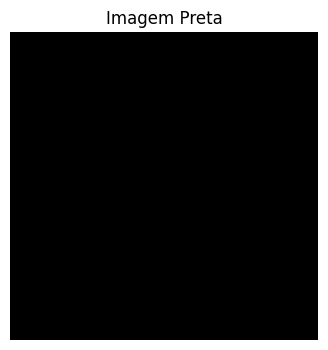

In [ ]:
black_image = np.zeros((100, 100), dtype=np.uint8)

show_image(black_image, title='Imagem Preta')

### Desenhando um Ponto
Para desenhar um ponto em uma imagem, precisamos modificar o valor de intensidade de um pixel específico. As coordenadas dos pixels são representadas por (y, x), onde y é a linha e x é a coluna. Vamos desenhar um ponto branco (intensidade 255) no centro da imagem preta.

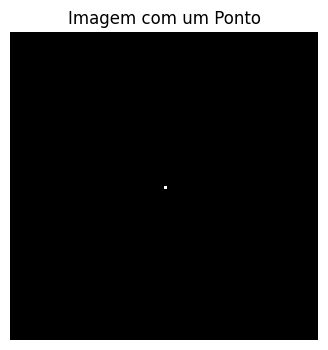

In [ ]:
black_image[50, 50] = 255

show_image(black_image, title='Imagem com um Ponto')

### Desenhando um Retângulo
Para desenhar um retângulo, precisamos modificar os valores de intensidade de um conjunto de pixels que formam a forma desejada. Vamos desenhar um retângulo branco na imagem preta. O retângulo terá coordenadas de (25, 40) a (75, 60).

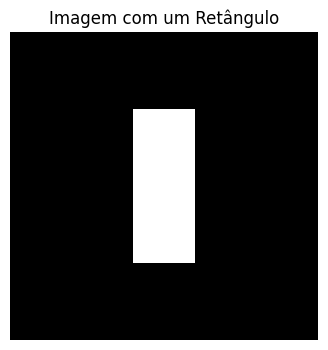

In [ ]:
rectangle_image = np.zeros((100, 100), dtype=np.uint8)

for y in range(25, 75):
    for x in range(40, 60):
        rectangle_image[y, x] = 255

show_image(rectangle_image, title='Imagem com um Retângulo')

### Desenhando um Círculo
Para desenhar um círculo, precisamos modificar os valores de intensidade dos pixels que estão dentro de uma determinada distância (raio) de um ponto central. Vamos desenhar um círculo branco com centro em (50, 50) e raio de 25 pixels.

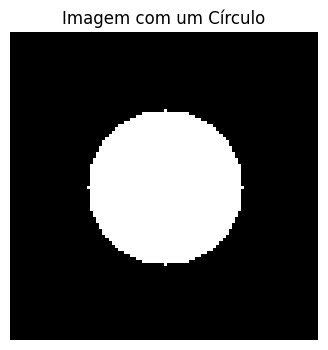

In [ ]:
circle_image = np.zeros((100, 100), dtype=np.uint8)
center = (50, 50)
radius = 25

for y in range(100):
    for x in range(100):
        dist = (x - center[0])**2 + (y - center[1])**2
        if dist <= radius**2:
            circle_image[y, x] = 255

show_image(circle_image, title='Imagem com um Círculo')

### Criando um Gradiente
Um gradiente é uma transição suave de uma cor para outra. Vamos criar uma imagem com um gradiente horizontal de cor, indo do preto ao branco. O valor de cada pixel será interpolado entre as cores inicial e final.

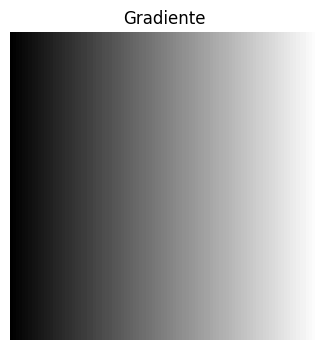

In [ ]:
def create_gradient(width, height, start_color, end_color):
    gradient_image = np.zeros((height, width), dtype=np.uint8)

    for x in range(width):
        color = start_color + (end_color - start_color) * (x / (width - 1))
        gradient_image[:, x] = color

    return gradient_image

gradient_image = create_gradient(100, 100, 0, 255)
show_image(gradient_image, title='Gradiente')

### Carregando Imagens Grayscale
A imagem Lenna é uma imagem amplamente utilizada em processamento de imagens. Vamos carregá-la em escala de cinza. Em grayscale, cada pixel tem um valor de intensidade entre 0 e 255.

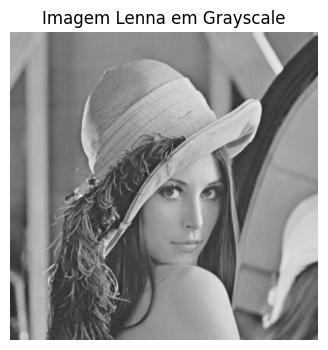

In [ ]:
import cv2

lenna_gray = cv2.imread('data/lenna.png', cv2.IMREAD_GRAYSCALE)

show_image(lenna_gray, title='Imagem Lenna em Grayscale')

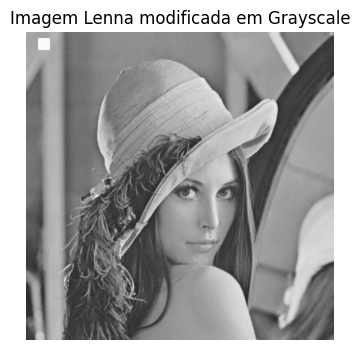

In [ ]:
lenna_gray_modificada = lenna_gray.copy()  # Create a copy to avoid modifying the original
lenna_gray_modificada[10:30, 20:40] = 250  # Modify the specific region of the copy
show_image(lenna_gray_modificada, title='Imagem Lenna modificada em Grayscale')

#### Histograma
Com o histograma podemos visualizar a frequência de cada intensidade de cor nos pixels da imagem

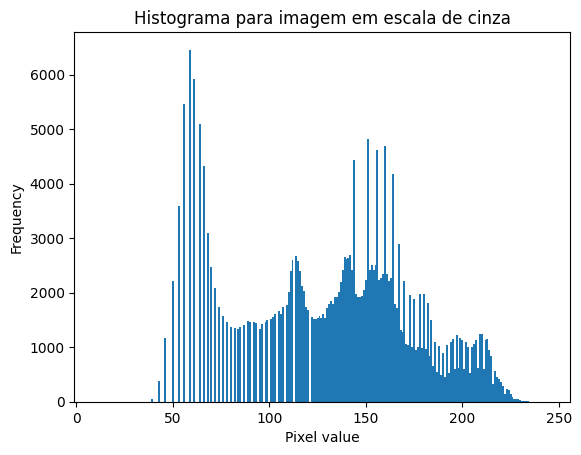

In [ ]:
# Definindo uma função para plotar o histograma de uma imagem
def plot_histogram_gray(image, title='Histograma para imagem em escala de cinza'):
    # Calculando o histograma
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plotando o histograma
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.bar(range(256), histogram.flatten(), width=1)
    plt.xlim([-1, 256])
    plt.show()


plot_histogram_gray(lenna_gray)

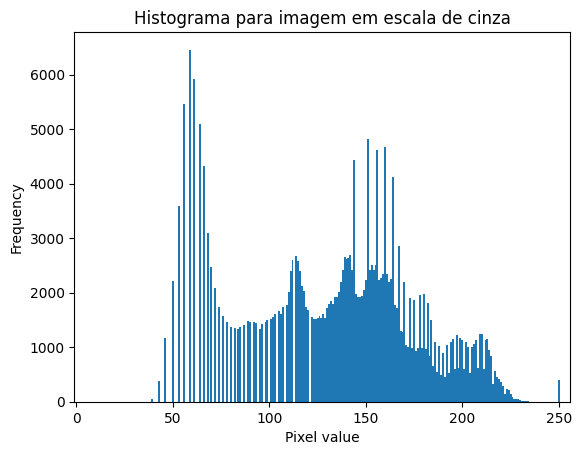

In [ ]:
# Definindo uma função para plotar o histograma de uma imagem
def plot_histogram_gray(image, title='Histograma para imagem em escala de cinza'):
    # Calculando o histograma
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plotando o histograma
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.bar(range(256), histogram.flatten(), width=1)
    plt.xlim([-1, 256])
    plt.show()


plot_histogram_gray(lenna_gray_modificada)

### Carregando Imagens Coloridas
Vamos carregar a mesma imagem em cores (RGB). Em imagens RGB, cada pixel é representado por três valores que correspondem às intensidades das cores vermelho, verde e azul.

Shape: (512, 512, 3)


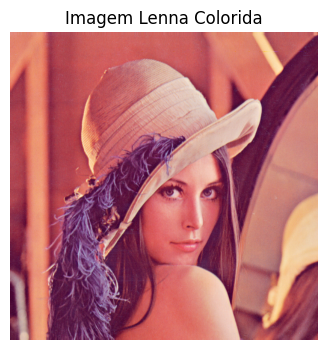

In [ ]:
lenna_color = cv2.imread('data/lenna.png')
lenna_color = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2RGB)

print("Shape:", lenna_color.shape)

show_image(lenna_color, title='Imagem Lenna Colorida')

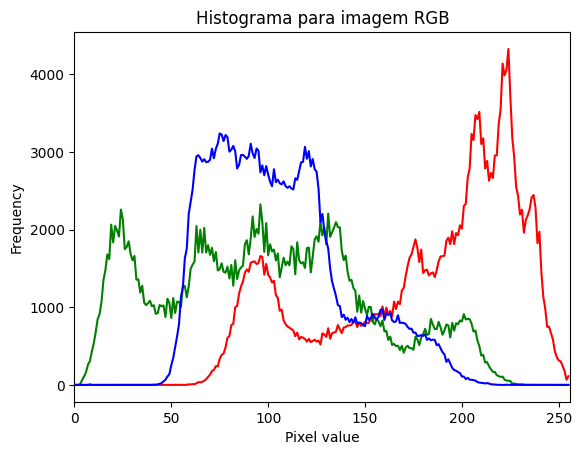

In [ ]:
# Definindo uma função para plotar histogramas para imagens RGB
def plot_histogram_rgb(image, title='Histograma para imagem RGB'):
    colors = ('r', 'g', 'b')
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')

    for i, color in enumerate(colors):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color)
        plt.xlim([0, 256])

    plt.show()


plot_histogram_rgb(lenna_color)

### Explorando os Canais de Cor RGB
Vamos separar os canais de cor (R, G, B) da imagem colorida e visualizá-los individualmente. Cada canal é uma imagem em escala de cinza que representa a intensidade da respectiva cor em cada pixel.

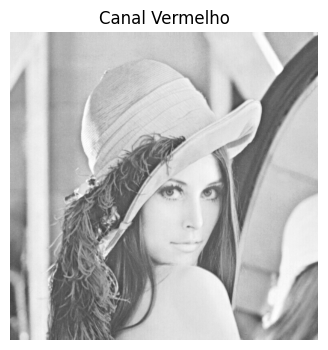

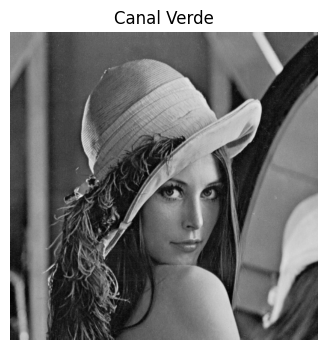

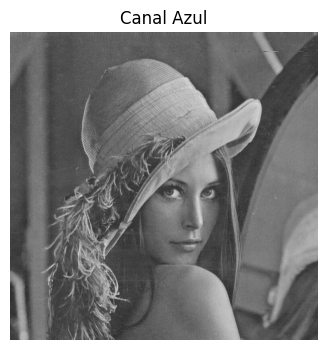

In [ ]:
r = lenna_color[:, :, 0]
g = lenna_color[:, :, 1]
b = lenna_color[:, :, 2]

show_image(r, title='Canal Vermelho')
show_image(g, title='Canal Verde')
show_image(b, title='Canal Azul')

### Editando Canais de Cor e Combinando
Vamos desenhar círculos em cada canal de cor da imagem Lenna. Esses círculos se sobreporão em algumas partes, criando diferentes cores na imagem final combinada.

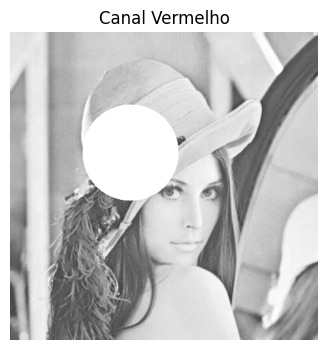

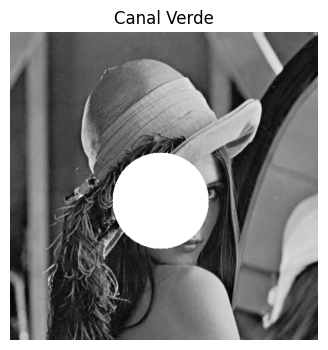

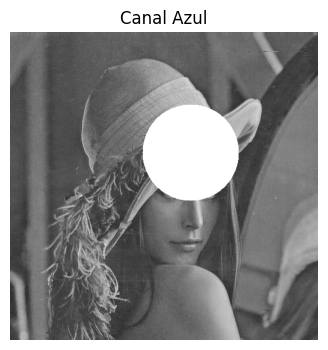

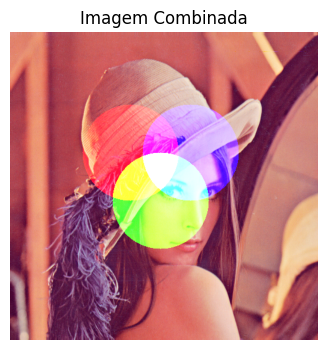

In [ ]:
def draw_circle(image, center, radius, intensity):
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
                image[y, x] = intensity
    return image

# Desenhando círculos nos canais
r_circle = draw_circle(r.copy(), (200, 200), 80, 255)
g_circle = draw_circle(g.copy(), (250, 280), 80, 255)
b_circle = draw_circle(b.copy(), (300, 200), 80, 255)

show_image(r_circle, title='Canal Vermelho')
show_image(g_circle, title='Canal Verde')
show_image(b_circle, title='Canal Azul')

# Combinando os canais
combined_image = np.stack([r_circle, g_circle, b_circle], axis=-1)
show_image(combined_image, title='Imagem Combinada')

## Exercícios
Agora é sua vez!

### Exercício 1
Usando apenas manipulação de matrizes (sem o auxílio do OpenCV), converta a imagem contida na variável `lenna_color` para escala de cinza e em seguida plote a imagem convertida e o histograma do resultado.

Fórmula de Luminosidade:

A fórmula combina os canais de cor (R, G, B) com pesos específicos para calcular a intensidade de cinza percebida:

valor_cinza
= 0.299 x 𝑅 + 0.587 x 𝐺 + 0.114 x 𝐵

In [ ]:
lenna_color2 = cv2.imread('data/lenna.png')
lenna_color2 = cv2.cvtColor(lenna_color2, cv2.COLOR_BGR2RGB)

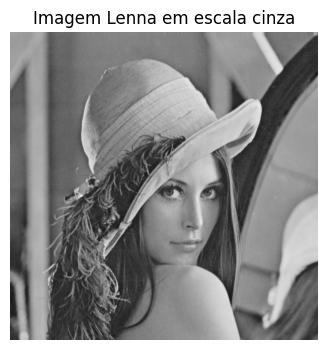

In [ ]:
for y in range(lenna_color2.shape[0]):
    for x in range(lenna_color2.shape[1]):
            r = lenna_color2[y, x, 0]  # Acessa os valores individuais dos pixels
            g = lenna_color2[y, x, 1]
            b = lenna_color2[y, x, 2]
            valor_cinza = (0.299 * r + 0.587 * g + 0.114 * b)
            lenna_color2[y, x] = valor_cinza

lenna_gray1 = lenna_color2
# Exibir o resultado
show_image(lenna_gray1, title='Imagem Lenna em escala cinza')

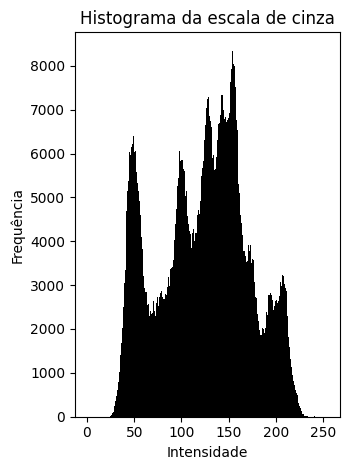

In [ ]:
# Histograma da escala de cinza
plt.subplot(1, 2, 2)
plt.hist(lenna_color2.ravel(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da escala de cinza")
plt.xlabel("Intensidade")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

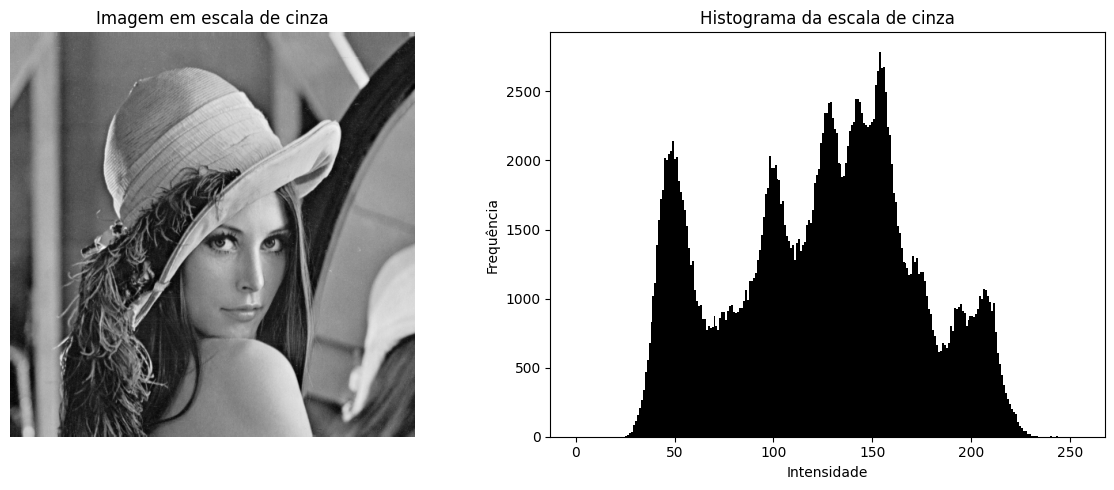

In [ ]:
# lenna_color está no formato uint8, normalizar para [0, 1] para cálculos
lenna_color = lenna_color / 255.0 if lenna_color.max() > 1 else lenna_color

# Converter para escala de cinza usando os pesos padrão de luminosidade
weights = np.array([0.2989, 0.5870, 0.1140])  # Pesos para R, G, B
lenna_gray = np.dot(lenna_color[..., :3], weights)

# Se necessário, volte ao intervalo [0, 255]
lenna_gray = (lenna_gray * 255).astype(np.uint8)

# Plotar a imagem convertida para escala de cinza
plt.figure(figsize=(12, 5))

# Imagem em escala de cinza
plt.subplot(1, 2, 1)
plt.imshow(lenna_gray, cmap='gray')
plt.title("Imagem em escala de cinza")
plt.axis('off')

# Histograma da escala de cinza
plt.subplot(1, 2, 2)
plt.hist(lenna_gray.ravel(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da escala de cinza")
plt.xlabel("Intensidade")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


### Exercício 2
Usando apenas manipulação de matrizes (sem o auxílio do OpenCV), binarize a imagem em escala de cinza obtida no exercício anterior. Faça 3 variações variando o threshold.

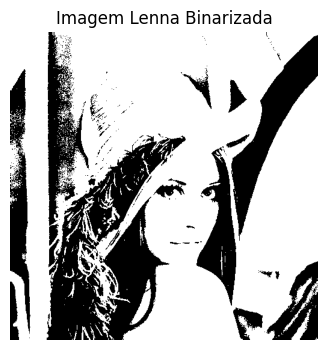

In [ ]:
# Criar matriz para armazenar imagem binarizada
lenna_threshold = np.zeros((512, 512), dtype=np.uint8)

# Aplicar a binarização diretamente
for y in range(512):
    for x in range(512):
        if lenna_gray[y, x] > 100:  # Comparar diretamente com o threshold
            lenna_threshold[y, x] = 255

# Exibir o resultado
show_image(lenna_threshold, title='Imagem Lenna Binarizada')


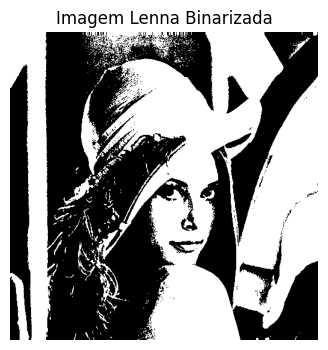

In [ ]:
lenna_threshold = np.zeros((512, 512))

threshold = 130

for y in range(512):
    for x in range(512):
      pixels = lenna_gray1[y,x]
      if np.any(pixels >= threshold):
          lenna_threshold[y, x] = 255


show_image(lenna_threshold, title='Imagem Lenna Binarizada')

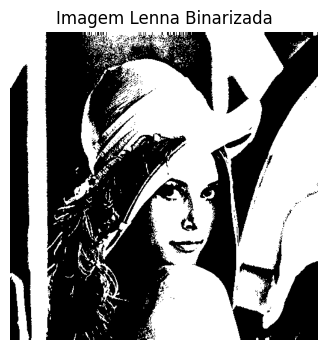

In [ ]:
lenna_threshold = np.zeros((512, 512))

threshold = 130

for y in range(512):
    for x in range(512):
      pixels = lenna_gray[y,x]
      if pixels >= threshold:
          lenna_threshold[y, x] = 255


show_image(lenna_threshold, title='Imagem Lenna Binarizada')

## Resolvendo os exercícios de outra forma usando as bibliotecas PIL e IPython.display

**Etapas do Projeto**

1. Carregando a Imagem
Para começar, utilizamos uma imagem colorida carregada diretamente do Google Drive em um ambiente Google Colab. Essa imagem serviu como base para as transformações subsequentes.

In [ ]:
from PIL import Image

In [ ]:
caminho_imagem = 'data/lenna.png'
lenna_original = Image.open(caminho_imagem)

Se for usar imagens que estão no Google Drive faça assim:

from google.colab import drive

drive.mount('/content/drive')

caminho_imagem = "/content/drive/My Drive/maltese-1123016_1280.jpg"

imagem_original = Image.open(caminho_imagem)

2. Conversão para Tons de Cinza

A conversão para tons de cinza reduz os três canais RGB para um único canal de intensidade, simplificando os dados da imagem.
Cada pixel foi processado individualmente. Abaixo está a implementação:

In [ ]:
def converter_para_cinza(imagem):

  largura, altura = imagem.size
  imagem_cinza = Image.new("L", (largura, altura))  # Escala de cinza

  for y in range(altura):
      for x in range(largura):
          r, g, b = imagem.getpixel((x, y))
          valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
          imagem_cinza.putpixel((x, y), valor_cinza)

  return imagem_cinza

3. Binarização (Preto e Branco)

Na binarização, os pixels são convertidos para apenas dois valores: preto (0) ou branco (255). A decisão é baseada em um limiar (threshold), que define o valor de corte:

Se o pixel for maior que o limiar, torna-se branco.
Caso contrário, torna-se preto.
A implementação é a seguinte:

In [ ]:
def binarizar_imagem(imagem_cinza, limiar=127):
  largura, altura = imagem_cinza.size
  imagem_binaria = Image.new("1", (largura, altura))  # Binária

  for y in range(altura):
      for x in range(largura):
          valor_cinza = imagem_cinza.getpixel((x, y))
          valor_binario = 1 if valor_cinza > limiar else 0
          imagem_binaria.putpixel((x, y), valor_binario)

  return imagem_binaria

4. Exibição das Imagens

No Google Colab, utilizamos o método display da biblioteca IPython.display para exibir as imagens diretamente no notebook.

In [ ]:
from IPython.display import display

In [ ]:
# Converter a imagem para cinza
lenna_cinza = converter_para_cinza(lenna_original)

# Binarizar a imagem
lenna_binaria = binarizar_imagem(lenna_cinza, limiar=123)


Resultados

A partir da imagem colorida original, geramos as seguintes transformações:

Imagem Original:


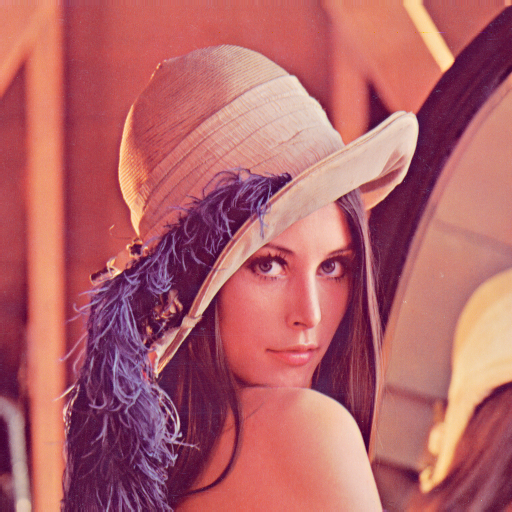

In [ ]:
# Exibir as imagens processadas
print("Imagem Original:")
display(lenna_original)


Imagem em Tons de Cinza:


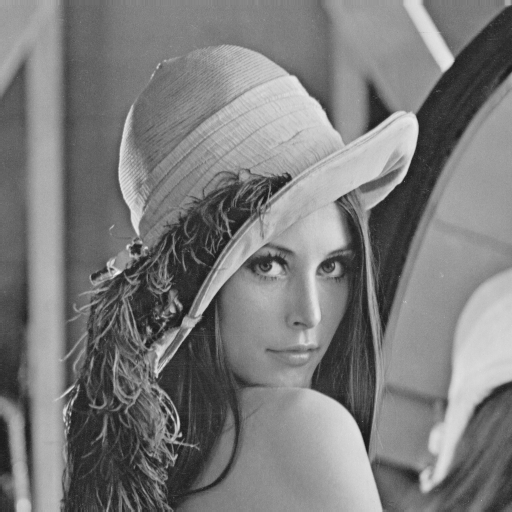

In [ ]:
print("Imagem em Tons de Cinza:")
display(lenna_cinza)

Imagem Binarizada:


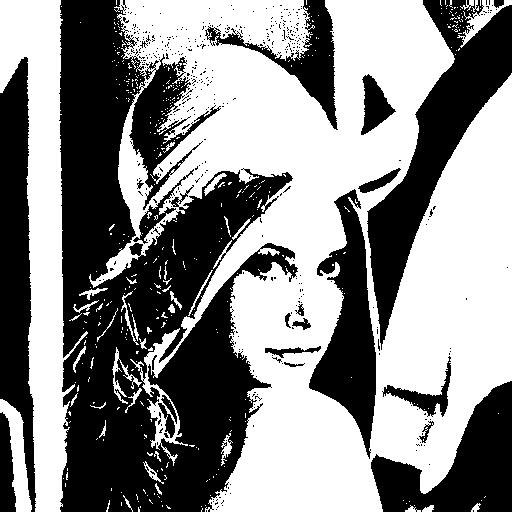

In [ ]:
print("Imagem Binarizada:")
display(lenna_binaria)